About this Notebook-
In this notebook, I will work how to use OLS Method to implement simple linear regression.I will split our data into training and test sets, create a model using training set, evaluate model using test, and finally use model to predict unknown value and i will also chcek the linearity and multicolinearity before model building and after model building i will check Normality,Zero Mean,Homoscadasticity[Constant Var], Auto-Correlation [Indepdence].

# All Important Package 

In [1]:
import pandas as pd # data manipulation 
import numpy as np # mathematical use 
import seaborn as sns # Viz
import matplotlib.pyplot as plt #Viz
import statsmodels.formula.api as smf #model Building
from sklearn.model_selection import train_test_split #splitting the data 
from statsmodels.stats.diagnostic import het_breuschpagan #Homo
import scipy #scientfic things 
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error #accuracy 
import statsmodels.api as sm #QQplot
from statsmodels.stats.diagnostic import het_breuschpagan # homo hetro testing
from statsmodels.stats.stattools import durbin_watson #durbin watson test

C:\Users\Sanchi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# data loading and basic things about data 

In [2]:
Salary_Data=pd.read_csv("Salary_Data.csv")
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
Salary_Data.shape
#we have 2 clm with  row 

(30, 2)

In [4]:
Salary_Data.info()
#no null and both are continous 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# EDA

In [6]:
def min_outlier(n):
    outlier_value=n-(1.5*n)
    return outlier_value    


In [7]:
print("year of exp outlier {}".format(min_outlier(3.2)))
print("Salry outlier {}".format(min_outlier(37731)))


year of exp outlier -1.6000000000000005
Salry outlier -18865.5


In [8]:
Salary_Data[Salary_Data.YearsExperience<-1.6]

,YearsExperience,Salary


In [9]:
Salary_Data[Salary_Data.Salary<=-18865.5]

,YearsExperience,Salary


In [10]:
def max_outlier(n):
    outlier_value=n+(1.5*n)
    return outlier_value    

In [11]:
print("year of exp outlier {}".format(max_outlier(7.7)))
print("Salry outlier {}".format(max_outlier(100544.75)))


year of exp outlier 19.25
Salry outlier 251361.875


In [12]:
Salary_Data.loc[Salary_Data.YearsExperience>=19.25]

,YearsExperience,Salary


In [13]:
Salary_Data.loc[Salary_Data.Salary>=251361.875]

,YearsExperience,Salary


Now i am going to know about data in depth with using 1BM(mean , median , mode) 2BM (Var, kurtosis),3BM(skew),4th (Kurto)
Pdf(ND)

In [14]:
Salary_Data.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [15]:
Salary_Data.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [16]:
Salary_Data.nunique()
#max are unique 

YearsExperience    28
Salary             30
dtype: int64

In [17]:
Salary_Data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [18]:
Salary_Data.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [19]:
Salary_Data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

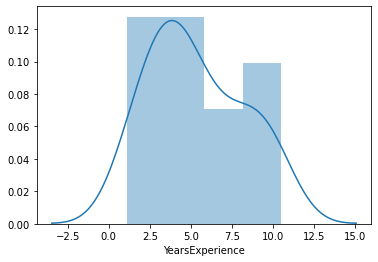

In [20]:
sns.distplot(Salary_Data.YearsExperience)
#very little + skewness 
# transformation need 

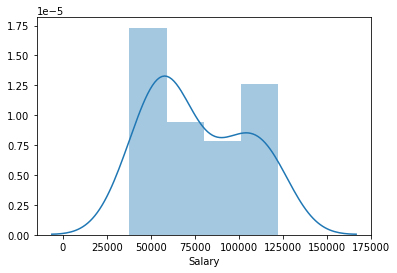

In [21]:
sns.distplot(Salary_Data.Salary)
#very little + skewness 
# transformation need 

In [22]:
Salary_Data.kurt()


YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [23]:
stat, p=scipy.stats.shapiro(Salary_Data.Salary)
print("stats={}, p={}".format(stat,p))
#data is ND 


stats=0.9103151559829712, p=0.015155306085944176


In [24]:
stat, p=scipy.stats.shapiro(Salary_Data.YearsExperience)
print("stats={}, p={}".format(stat,p))

stats=0.9420625567436218, p=0.10337652266025543


Linear Regression MOdel Building Part 
here i know data is normaliy distributed but i will build linear model then i will transform the data then again i will build the model

In [25]:
train , test= train_test_split(Salary_Data,random_state=0,test_size=.25)

In [26]:
train.shape

(22, 2)

In [27]:
test.shape

test

,YearsExperience,Salary
2,1.5,37731.0
28,10.3,122391.0
13,4.1,57081.0
10,3.9,63218.0
26,9.5,116969.0
24,8.7,109431.0
27,9.6,112635.0
11,4.0,55794.0


In [28]:
model=smf.ols("Salary~YearsExperience",data=train).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     310.8
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.18e-13
Time:                        23:44:59   Log-Likelihood:                -222.44
No. Observations:                  22   AIC:                             448.9
Df Residuals:                      20   BIC:                             451.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.699e+04   2927.416      9.219      0.000    2.09e+04    3.31e+04
YearsExperience  9379.7105    532.042     17.630      0.000    8269.891    1.05e+04
==============================================================================
Omnibus:                        3.210   Durbin-Watson:                   2.601
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                1.397
Skew:                           0.188   Prob(JB):                        0.497
Kurtosis:                       1.824   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
predict=model.predict(test)
predict

2      41056.257055
28    123597.709384
13     65443.504334
10     63567.562235
26    116093.940990
24    108590.172597
27    117031.912039
11     64505.533285
dtype: float64

In [31]:
r2_score(test.Salary,predict)

0.97792083354176

In [32]:
mean_squared_error(test.Salary,predict)

22407940.14334081

In [33]:
test.Salary-predict

2    -3325.257055
28   -1206.709384
13   -8362.504334
10    -349.562235
26     875.059010
24     840.827403
27   -4396.912039
11   -8711.533285
dtype: float64

In [34]:
preduict1=model.predict(train)

In [35]:
train.Salary-preduict1

17     6388.843076
22      215.595797
5      2454.148257
16    -8794.214826
8      7443.235109
14    -8084.388530
23     9911.682649
20      969.277338
1      7024.685044
29    -3601.651482
6      5024.177207
4     -7731.054399
18     -963.983219
19    10675.045732
9     -4502.620137
7     -2556.764891
25    -5822.085744
3     -2221.112301
0      2038.627142
21     4690.364190
15    -5009.272727
12    -7548.533285
dtype: float64

In [36]:
Residual=model.resid
Residual

17     6388.843076
22      215.595797
5      2454.148257
16    -8794.214826
8      7443.235109
14    -8084.388530
23     9911.682649
20      969.277338
1      7024.685044
29    -3601.651482
6      5024.177207
4     -7731.054399
18     -963.983219
19    10675.045732
9     -4502.620137
7     -2556.764891
25    -5822.085744
3     -2221.112301
0      2038.627142
21     4690.364190
15    -5009.272727
12    -7548.533285
dtype: float64

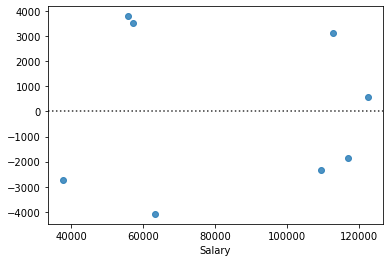

In [37]:
sns.residplot(test.Salary,predict)

# checking the basic things in Error 

Linarity

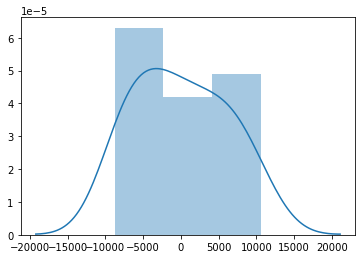

In [38]:
sns.distplot(Residual)

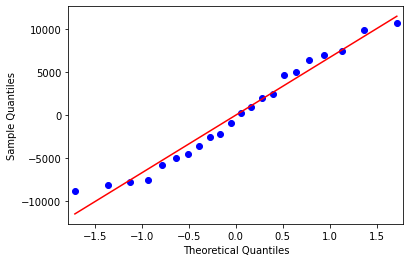

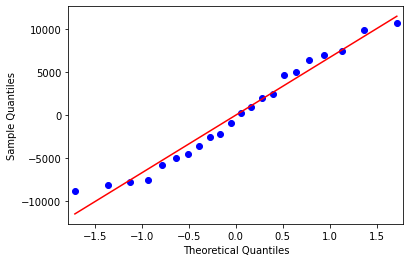

In [39]:
#Q-Q plot for normality
sm.qqplot(Residual, line='r')


In [40]:
scipy.stats.shapiro(Residual)

(0.9493038058280945, 0.3059421479701996)

Multicolinearity 
i will not get any type of multicolinearity bcz i am working in SLR 

cheking for homoscadasticity(constant mean ) and hetro(not constant mean)

In [41]:
a,b,c,d=het_breuschpagan(Residual, model.model.exog)
print("LM Statistic{}," "LM-Test p-value{}," "F-Statistic{}," "F-Test p-value{}".format(a,b,c,d))

LM Statistic0.08168617129526634,LM-Test p-value0.7750252361970041,F-Statistic0.07453691185705096,F-Test p-value0.7876412667460855


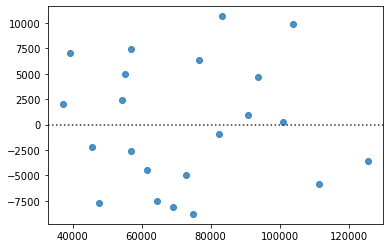

In [42]:
sns.residplot(model.predict(),Residual)

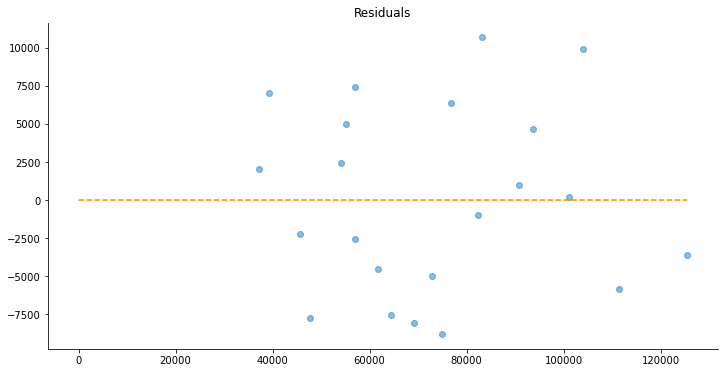

In [43]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=model.predict(), y=Residual, alpha=0.5)
plt.plot(np.repeat(0, model.predict().max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()  

In [52]:
model.predict()

array([ 76699.15692405, 101086.40420311,  54187.85174338,  74823.21482566,
        57001.76489096,  69195.38853049, 103900.31735069,  90768.72266197,
        39180.31495627, 125473.65148217,  55125.82279258,  47622.05439902,
        82326.98321922,  83264.95426841,  61691.62013694,  57001.76489096,
       111404.08574425,  45746.11230063,  37304.37285788,  93582.63580955,
        72947.27272727,  64505.53328452])

In [53]:
Residual

17     6388.843076
22      215.595797
5      2454.148257
16    -8794.214826
8      7443.235109
14    -8084.388530
23     9911.682649
20      969.277338
1      7024.685044
29    -3601.651482
6      5024.177207
4     -7731.054399
18     -963.983219
19    10675.045732
9     -4502.620137
7     -2556.764891
25    -5822.085744
3     -2221.112301
0      2038.627142
21     4690.364190
15    -5009.272727
12    -7548.533285
dtype: float64

Autocorrelation 

In [44]:
import statsmodels.graphics.tsaplots

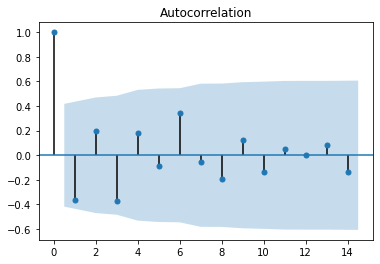

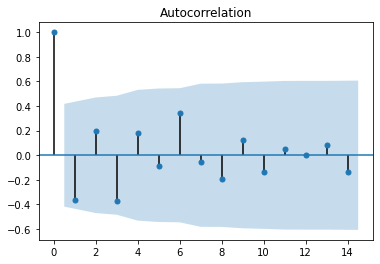

In [45]:
statsmodels.graphics.tsaplots.plot_acf(Residual)

In [46]:
statsmodels.stats.stattools.durbin_watson(Residual)
#auto corr is there 

2.6013030266777095

In [47]:
model.resid.mean() # almost Zero 

-2.1166422150351785e-11

I have some doubt 
1-Standard Errors assume that the covariance matrix of the errors is correctly specified. whats its mean.
2-Model is good or not 
3-Autocorrelation is .93 by durban method but with acf it showing correct so little bit confusion 

Ans-
1-multicollinearity doesnt impact here
2-
3-The durbin test is ok . As I said sometimes around that number is also ok, Will check the others alao